# Need for Adaptive Filters
- The filter design techniques based on knowledge of the second-order statistics
of the signals, there are many digital signal processing applications in which
these statistics cannot be specified a priori.
- In contrast *Adaptive Filters* incorporate algorithms that allow the filter coefficients to adapt to the signal statistics.


# The Least Means Square *(LMS)* Algorithm

<p>Let us assume that we have available the data sequence $x(n)$, which consists
of samples from a stationary random process with autocorrelation sequence:  $\gamma_{xx} = E\left(x(n)x^{*}(n-m)\right)$</p>
<!-- <br/> -->
<p>&nbsp;&nbsp;&nbsp;&nbsp;From these samples, we form an estimate of the desired sequence $d(n)$ by passing the observed data $x(n)$ through an FIR filter with coefficients $h(n), n = 0,1,...,M-1$. The filter output may be expressed as $\hat{d}(n) = \sum_{k=0}^{M-1} h(k)x(n-k)$, where $\hat{d}(n)$ represents an estimate of $d(n)$.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp; The esimation error is defined as 
\begin{equation}
e(n)  = d(n) - \hat{d}(n) = d(n) - \sum_{k=0}^{M-1} h(k)x(n-k)
\end{equation}
</p>
<p>
The mean-square error as a function of the filter coefficients is
\begin{equation*}
\xi_{M} = E\left[|e(n)|^{2}\right] \\
\xi_{M} = E\left[|d(n) - \sum_{k=0}^{M-1} h(k)x(n-k)|^{2}\right] \\
\xi_{M} = E\left[|d(n)|^{2}\right] - 2Re\left[\sum_{k=0}^{M-1} h^{*}(l)\gamma_{dx}(l) \right] + \sum_{l=0}^{M-1}\sum_{k=0}^{M-1} h^{*}(l)h(k)\gamma_{xx}(l-k) \\
\end{equation*}
</p>
<p>
The minimization of $\xi_{M}$ with respect to the coefficients leads to the set of $M$ linear equations <i>(The Wiener–Hopf equations)</i>,
\begin{equation*}
\sum_{k=0}^{M-1}h(k)\gamma_{xx}(l-k) = \gamma_{dx}(l),\: l = 0,1,...,M-1
\end{equation*}
</p>
<p> 
These equations can be expressed in matrix form as
\begin{equation*}
\Gamma_{M}h_{M} = \gamma_{d} \\
h_{opt} = \Gamma_{M}^{-1}\gamma_{d}
\end{equation*}
where $h_{M}$ denotes the vector of coefficients, $\Gamma_{M}$ is an $ M \times M$ Toeplitz matrix with elements $\Gamma_{lk} = \gamma_{xx}(l-k)$, and $\gamma_{d}$ is an $M \times 1$ crosscorrelation vector with elements $\gamma_{dx}(l), \: l = 0,1,...,M-1$.
</p>
<p>
&nbsp;&nbsp;&nbsp;&nbsp;The optimum filter coefficients $h_{opt}$ can be obtainted by solving the above equations using the <i>Levinson-Durbin algorithm</i>. Here $\Gamma_{M}^{-1}$ can be computed using Newton's Method which can be computationally expensive.
</p>

<p> In our problem, $\xi_{M}$ is a quadratic function of the filter coefficients. Hence this function has a unique minimum $h_{opt}$, which we shall determine by iteratively searching using gradients.</p>
<p>
Let us assume that the autocorrelation matrix $\Gamma_{M}$ and the crosscorrelation vector $\gamma_{d}$ are known. Hence, $\xi_{M}$ is a known function of the coefficients $h(n)$, $0 ≤ n ≤ M − 1$. Algorithms for recursively computing the filter coefficients and, thus, searching for the minimum of $\xi_{M}$, have the form
\begin{equation*}
h_{M}(n+1) = h_{M}(n) - \frac{1}{2}\Delta(n)g(n), \: n=0,1,2,.. \\
g(n) = \frac{d\xi_{M}(n)}{dh_{M}(n)} = 2\left[\Gamma_{M}h_{M}(n)-\gamma_{d} \right]
\end{equation*}
where $h_{M}(n)$ is the vector of filter coefficients at the nth iteration, $\Delta(n)$ is a step size or learning rate at the nth iteration, and $g(n)$ is a gradient vector for the $n^{th}$ iteration. The initial vector $h_{M}(n)$ is chosen arbitrarily.</br>
The gradient vector $g(n)$ at each iteration and change the values of
$h_{M}(n)$ in a direction opposite the gradient. Thus, the recursive algorithm based on the method of steepest descent.
</p>

<p>
According to the orthogonality principle, the mean-square estimation error is minimized when the error $e(n)$ is orthogonal, in the statistical sense, to the estimate $\hat{d}(n)$ that is,
\begin{equation*}
E\left[e(n)\hat{d}^{*}(n)\right] = 0\\
E\left[e(n)x^{*}(n-l)\right] = 0, \: l=0,1,..,M-1 
\end{equation*}
Using the orthogonality principle
\begin{equation*}
E\left[e(n)X^{*}_{M}(n)\right] = \gamma_{d}-\Gamma_{M}h_{M}(n)
\end{equation*}
where $X^{*}_{M}(n)$ is the vector with elements $x(n − l),\: l = 0, 1, . . . , M − 1$. Therefore, the gradient vector is simply
\begin{equation*}
g(n) = -2E\left[e(n)X^{*}_{M}(n)\right]
\end{equation*}
Clearly, the gradient vector $g(n) = 0$ when the error is orthogonal to the data in the estimate $\hat{d}(n)$.</br>
An unbiased estimate of the gradient vector at the nth iteration is simply obtained as
\begin{equation*}
\hat{g}(n) = -2e(n)X^{*}_{M}(n)
\end{equation*}
Thus, with $\hat{g}(n)$ substituted for $g(n)$, we have the algorithm
\begin{equation*}
h_{M}(n+1) = h_{M}(n)+\Delta(n)e(n)X^{*}_{M}(n)
\end{equation*}
This is called a <b><i>stochastic-gradient-descent algorithm</i></b>.
</p>


![](https://www.textbook.ds100.org/_images/gradient_stochastic_sgd.png) To make sure that the function converges to the optimum value, the learning rate is slowly decreased.![](https://blog.paperspace.com/content/images/2018/05/fastlr.png)

<p>
It has become common practice in adaptive filtering to use a fixed-step-size
algorithm for two reasons. The first is that a fixed-step-size algorithm is easily implemented in either hardware or software. The second is that a fixed step size is appropriate for tracking time-variant signal statistics, whereas if $\Delta(n)\rightarrow0$ as $n \rightarrow \infty$, adaptation to signal variations cannot occur.</br>
For these reasons, the modified algorithm with fixed step size $\Delta$ is widely known as <b><i>the LMS (least-mean-squares) algorithm</i></b>.
\begin{equation*}
h_{M}(n+1) = h_{M}(n)+\Delta e(n)X^{*}_{M}(n)
\end{equation*}
The LMS algorithm is relatively simple to implement. For this reason, it has been widely used in many adaptive filtering applications.
</p>
<p>
Another version of the LMS algorithms, called a <i>normalized LMS(NLMS) algorithm</i>,
that is frequently used in practice is given as
\begin{equation*}
h_{M}(n+1) = h_{M}(n)+\frac{\Delta}{||X^{*}_{M}(n)||^{2}} e(n)X^{*}_{M}(n)
\end{equation*}
Thus, the step size at each iteration is inversely proportional to the energy in the received data vector $X^{*}_{M}(n)$. This scaling is advantageous in adaptive filtering applications where the dynamic range of the input to the adaptive filter is large.
<!-- , as would be the case, for example, in the implementation of adaptive equalizers for slowly fading communication channels. -->
</p>

<p>
The range of values of $\Delta$ that ensures the convergence of the mean of the coefficient vector in the LMS algorithm is
\begin{equation*}
0 < \Delta < \frac{2}{M\gamma_{xx}(0)}
\end{equation*}
where $\gamma_{xx}(0)$ is the input signal power, which is easily estimated from the received signal.
</p>

## Utils

In [2]:
!pip install padasip

  Created wheel for padasip: filename=padasip-1.1.1-cp36-none-any.whl size=52974 sha256=7ac7b1ead1b3bab9b456bf097b5d45ca252b9c6cdf2419817447292c3c38025c
  Stored in directory: /root/.cache/pip/wheels/64/33/7b/3fe5f0377cb1d58f8f565dc0e718ae80767f8f563e6a77f1ac
Successfully built padasip


In [3]:
import pandas as pd
import numpy as np
import padasip as pa
import matplotlib.pylab as plt
import seaborn as sns
import os
import scipy.io

%matplotlib inline
SEED = 121
np.random.seed(SEED)

## Example of LMS filter

In [4]:
# these two function supplement your online measurment
def measure_x():
    # it produces input vector of size 3
    x = np.random.random(3)
    return x
    
def measure_d(x):
    # meausure system output
    d = 2*x[0] + 1*x[1] - 1.5*x[2]
    return d

In [5]:
N = 100
log_d = np.zeros(N)
log_y = np.zeros(N)
filt = pa.filters.FilterLMS(3, mu=1.)
for k in range(N):
    # measure input
    x = measure_x()
    # predict new value
    y = filt.predict(x)
    # do the important stuff with prediction output
    pass    
    # measure output
    d = measure_d(x)
    # update filter
    filt.adapt(d, x)
    # log values
    log_d[k] = d
    log_y[k] = y

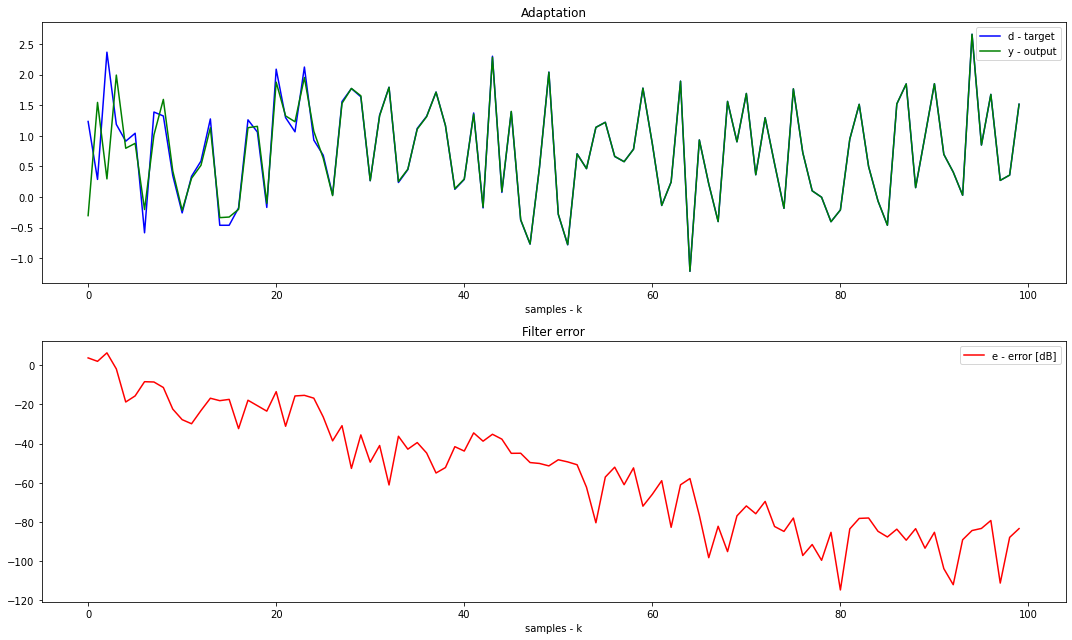

In [6]:
### show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(log_d,"b", label="d - target")
plt.plot(log_y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10((log_d-log_y)**2),"r", label="e - error [dB]")
plt.legend(); plt.tight_layout(); plt.show()

<p>
First, notice that the core update in the LMS filter depends only on the current output value and the last N input samples. This means that by approximating the gradient with only the last term, LMS naturally adapts to changing filter coeffcients. To make the filter more agile to dynamic $h_{*}$, we must find a way to slowly forget old inputs. This can be achieved by considering a regularized weighted least-squares problem. we can choose $h_{opt}$ by minimizing
\begin{equation*}
minimize \; E\left[|d(n) - \sum_{k=0}^{M-1} h(k)x(n-k)|^{2}\right]+\frac{\lambda}{2} ||h||_{2}^{2}
\end{equation*}
Here $\lambda$ is a regularization parameter. This is a Tikhonov-regularized least-squares problem. <i>Regularization</i> is defined as any modification we make to a learning algorithm that is intended to reduce its generalzation error but not its training error. Filter parameters are update follows the below equation.
\begin{equation*}
h_{M}(n+1) = (1-\lambda \Delta)h_{M}(n)+\Delta e(n)X^{*}_{M}(n)
\end{equation*}
</p>

## Removal of Noise from ECG Signal using NLMS Adaptive Filter

In [84]:
ecgdata = pd.read_csv('samples_rc.csv')

In [85]:
ecgdata.head()

,'Elapsed time','ECG I','ECG I filtered'
0,'hh:mm:ss.mmm','mV','mV'
1,'0:00.000',0.055,-0.090
2,'0:00.002',0.050,-0.015
3,'0:00.004',0.205,0.030
4,'0:00.006',0.270,0.060


In [86]:
ecgdata.drop([0],inplace=True)

In [87]:
ecgdata_r = ecgdata["'ECG I'"]
ecgdata_c = ecgdata["'ECG I filtered'"]

In [88]:
ecgdata_r = ecgdata_r.astype('float32')
ecgdata_c = ecgdata_c.astype('float32')

In [12]:
fs = 500
time = np.arange(ecgdata_r.shape[0]) / fs

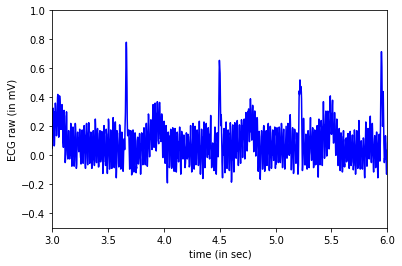

In [13]:
plt.plot(time,ecgdata_r,'b')
plt.xlabel("time (in sec)")
plt.ylabel("ECG raw (in mV)")
plt.xlim(3,6)
plt.ylim(-0.5, 1)
# plt.show()
plt.savefig('ecgraw.png',dpi=300)

(-0.5, 1.0)

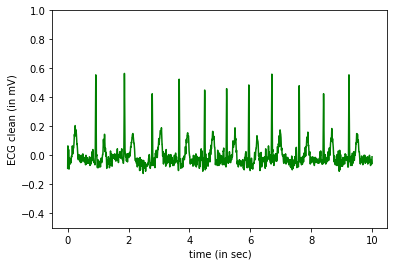

In [73]:
plt.plot(time,ecgdata_c,'g')
plt.xlabel("time (in sec)")
plt.ylabel("ECG clean (in mV)")
# plt.xlim(3,6)
plt.ylim(-0.5, 1)
# plt.show()
# plt.savefig('ecgclean.png',dpi=300)

In [67]:
n = 60

In [60]:
s = ecgdata_r.values.flatten()
c = ecgdata_c.values.flatten()

In [68]:
x = pa.input_from_history(s, n) 

In [69]:
d = np.zeros(len(x))
for i,k in enumerate(range(n-1,len(x))):
    d[i] = c[k+1]

In [70]:
f = pa.filters.FilterNLMS(n=n, mu=0.1, w="zeros")
y, e, w = f.run(d,x)

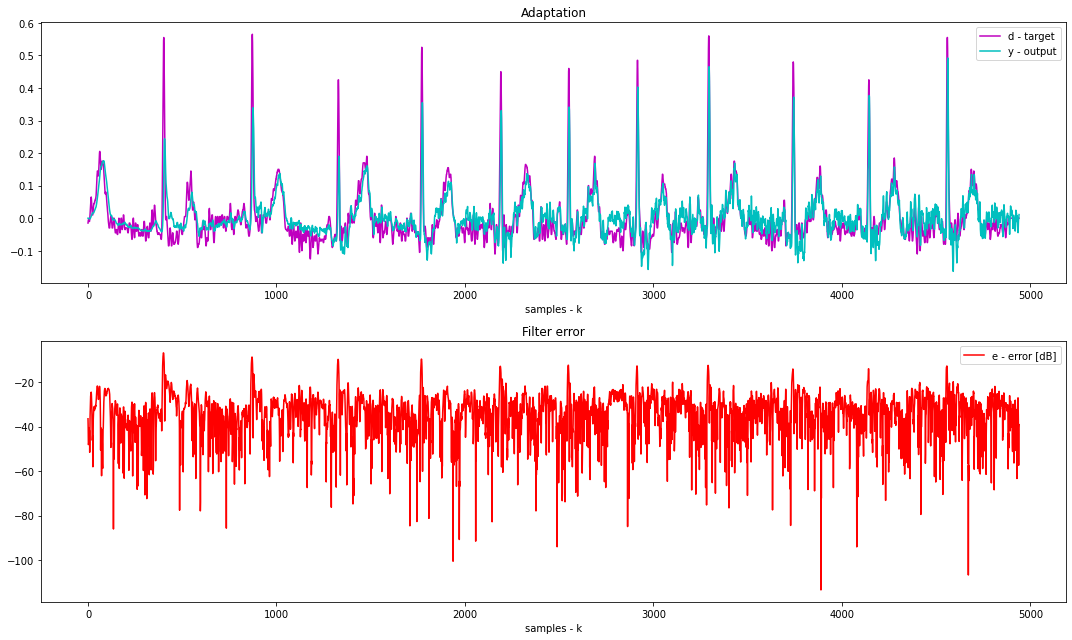

In [71]:
# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"m", label="d - target")
plt.plot(y,"c", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

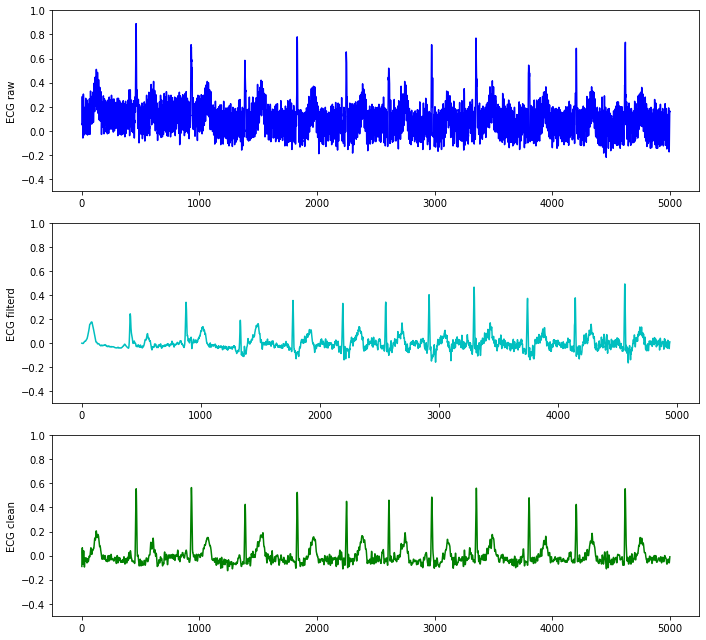

In [105]:
plt.figure(figsize=(10,9))
plt.subplot(311)
plt.plot(ecgdata_r,'b')
# plt.xlabel("time (in sec)")
plt.ylabel("ECG raw")
plt.ylim(-0.5, 1)
plt.subplot(312)
plt.plot(y,'c')
# plt.xlabel("time (in sec)")
plt.ylabel("ECG filterd")
plt.ylim(-0.5, 1)
plt.subplot(313)
plt.plot(ecgdata_c,'g')
# plt.xlabel("time (in sec)")
plt.ylabel("ECG clean")
plt.ylim(-0.5, 1)
plt.tight_layout()
plt.show()

In [77]:
ecg2 = pd.read_csv('samples2.csv')

In [78]:
ecg2.head()

,'Elapsed time','ECG I','ECG I filtered'
0,'hh:mm:ss.mmm','mV','mV'
1,'0:00.000',-0.185,-0.085
2,'0:00.002',-0.240,-0.070
3,'0:00.004',-0.195,-0.050
4,'0:00.006',-0.200,-0.035


In [81]:
ecg2.drop([0],inplace=True)

In [82]:
ecg2r = ecg2["'ECG I'"]
ecg2c = ecg2["'ECG I filtered'"]

In [89]:
ecg2r = ecg2r.astype('float32')
ecg2c = ecg2c.astype('float32')

In [90]:
r2 = ecg2r.values.flatten()
c2 = ecg2c.values.flatten()

In [92]:
x2 = pa.input_from_history(r2, n) 

In [99]:
# d2 = np.zeros(len(x2))
l2 = []
for i in range(len(x2)):
    l2.append(f.predict(x2[i]))

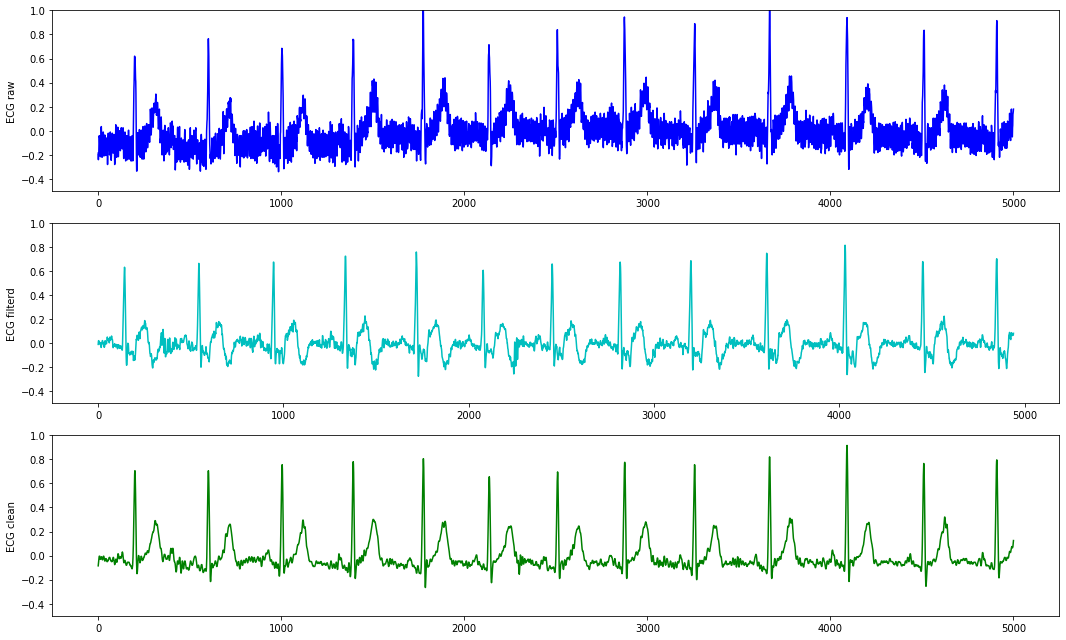

In [103]:
plt.figure(figsize=(15,9))
plt.subplot(311)
plt.plot(ecg2r,'b')
# plt.xlabel("time (in sec)")
plt.ylabel("ECG raw")
plt.ylim(-0.5, 1)
plt.subplot(312)
plt.plot(l2,'c')
# plt.xlabel("time (in sec)")
plt.ylabel("ECG filterd")
plt.ylim(-0.5, 1)
plt.subplot(313)
plt.plot(ecg2c,'g')
# plt.xlabel("time (in sec)")
plt.ylabel("ECG clean")
plt.ylim(-0.5, 1)
plt.tight_layout()
plt.show()

## Challenges with SGD

- Choosing a proper learning rate is a challenge, if our learning rate is smaller this results in slower convergence of our loss function towards the minimum and can take larger amount of time, but if our learning rate is too large, this causes overshooting of the function away from the minimum, there are a lot of fluctuations and our function may diverge.
- As we use the same learning rate to update all the parameters , the updating occurs by the same extent of all the parameters and we may not want this all the time.
- Another challenge for SGD Optimization is getting trapped in the so-called sub-optimal local minima in case of non-convex functions, also referred to as the saddle points, at this point the value of derivative is close to zero for a larger distance; i.e., surrounded by a plateau of same error, this causes a lot of problem for SGD and makes it hard for it to escape.![](https://miro.medium.com/max/775/1*Y2KPVGrVX9MQkeI8Yjy59Q.gif)
- Algorithms without scaling based on gradient information really struggle to break symmetry here ![](https://miro.medium.com/max/775/1*SjtKOauOXFVjWRR7iCtHiA.gif)

## Stock Price prediction using NLMS Filter

In [106]:
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')
df = pd.read_csv('datasets_1840_3212_Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv',
                parse_dates=['Date'],
                index_col='Date',
                date_parser=dateparse)
df.sort_index(inplace=True)
print(f'Data shape: {df.shape}')
display(df.head())

Data shape: (1226, 6)


,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2012-01-04,14050,14050,13700,13720,559100,7719804000
2012-01-05,13720,13840,13600,13800,511500,7030811000
2012-01-06,13990,14030,13790,13850,765500,10635609000
2012-01-10,13890,14390,13860,14390,952300,13533413000
2012-01-11,14360,14750,14280,14590,1043400,15191988000


In [107]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts['Close'] = pd.to_numeric(ts['Close'] , errors='coerce')
ts.dropna(inplace=True)
ts.drop(['Open', 'High', 'Volume', 'Low', 'Stock Trading'], axis=1, inplace=True)

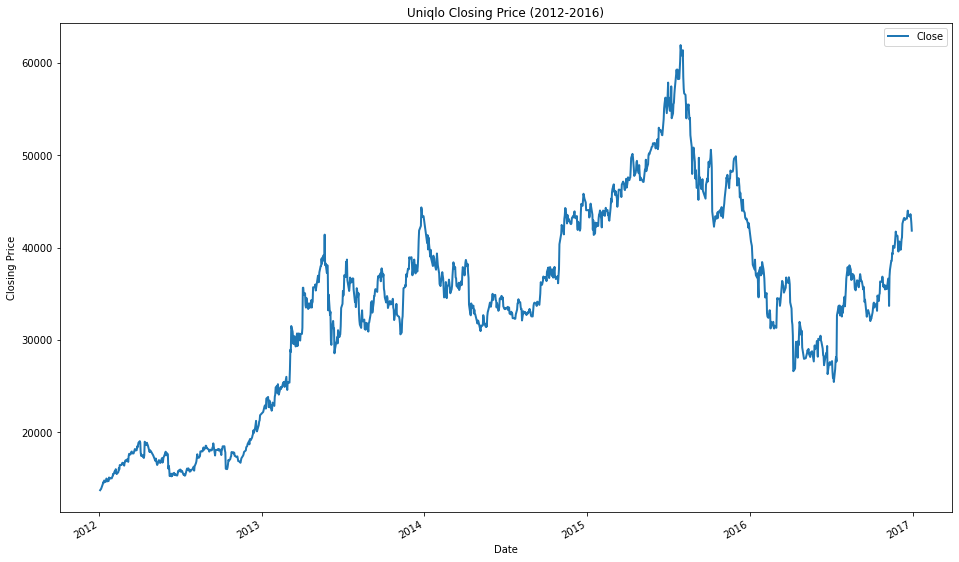

In [108]:
fig, ax = plt.subplots(figsize=(16, 10))
ts.plot(ax=ax, lw=2)
plt.ylabel('Closing Price')
plt.title('Uniqlo Closing Price (2012-2016)')
plt.show()

We will keep the first 1000 closing prices to demonstrate the adaptive filter

In [109]:
n = 5
s = ts['Close'].values.flatten()[: 1000]  # initial timeseries data
x = pa.input_from_history(s, n)  # input matrix
N = len(x)
print(f'Total length of data: {len(s)}')
print(f'Total length of data (after delay): {N}')
d = np.zeros(len(x))

# define target
for i, k in enumerate(range((n-1), N)):
    d[i] = s[k+1]

Total length of data: 1000
Total length of data (after delay): 996


In [110]:
def plot_filter_result(pred: np.ndarray, actual: np.ndarray, error: np.ndarray, n: int,
                       mu_val: str='0.05', section_visual_flag: bool=True):
    _avg_error = round(np.mean(10*np.log10(error[: (len(error) - n)]**2)), 2)
    plt.figure(figsize=(12.5, 20))
    plt.subplot(411)
    plt.title(f'NLMS (mu={mu_val})')
    plt.xlabel('No of iteration [-]')
    plt.plot(actual[: (len(actual)-n)], 'b', label='target')
    plt.plot(pred[: (len(pred)-n)], 'g', label='predict / output')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.title(f'Filter error (avg: {_avg_error})')
    plt.plot(10*np.log10(error[: (len(error) - n)]**2), 'r', label='Error')
    plt.axhline(y=_avg_error, color='black', lw=1, linestyle='--')
    if section_visual_flag:
        plt.subplot(413)
        plt.title('First 300 iterations')
        plt.xlabel(None)
        plt.plot(actual[: 300], "b", label='target')
        plt.plot(pred[: 300], "g", label='predict / output')
        plt.legend(loc='upper left')
        plt.subplot(414)
        plt.title('Last 300 iterations')
        plt.xlabel(None)
        plt.plot(actual[(len(actual) - 300 - n): (len(actual) - n)],
                 "b", label='target')
        plt.plot(pred[(len(pred) - 300 - n): (len(pred) - n)],
                 "g", label='predict / output')
        plt.legend(loc='upper left')
        
    plt.tight_layout()
    plt.show()
    return None

Now let's try different mu value (step size) for NLMS (Normalized Least-mean-squares) adaptive filter

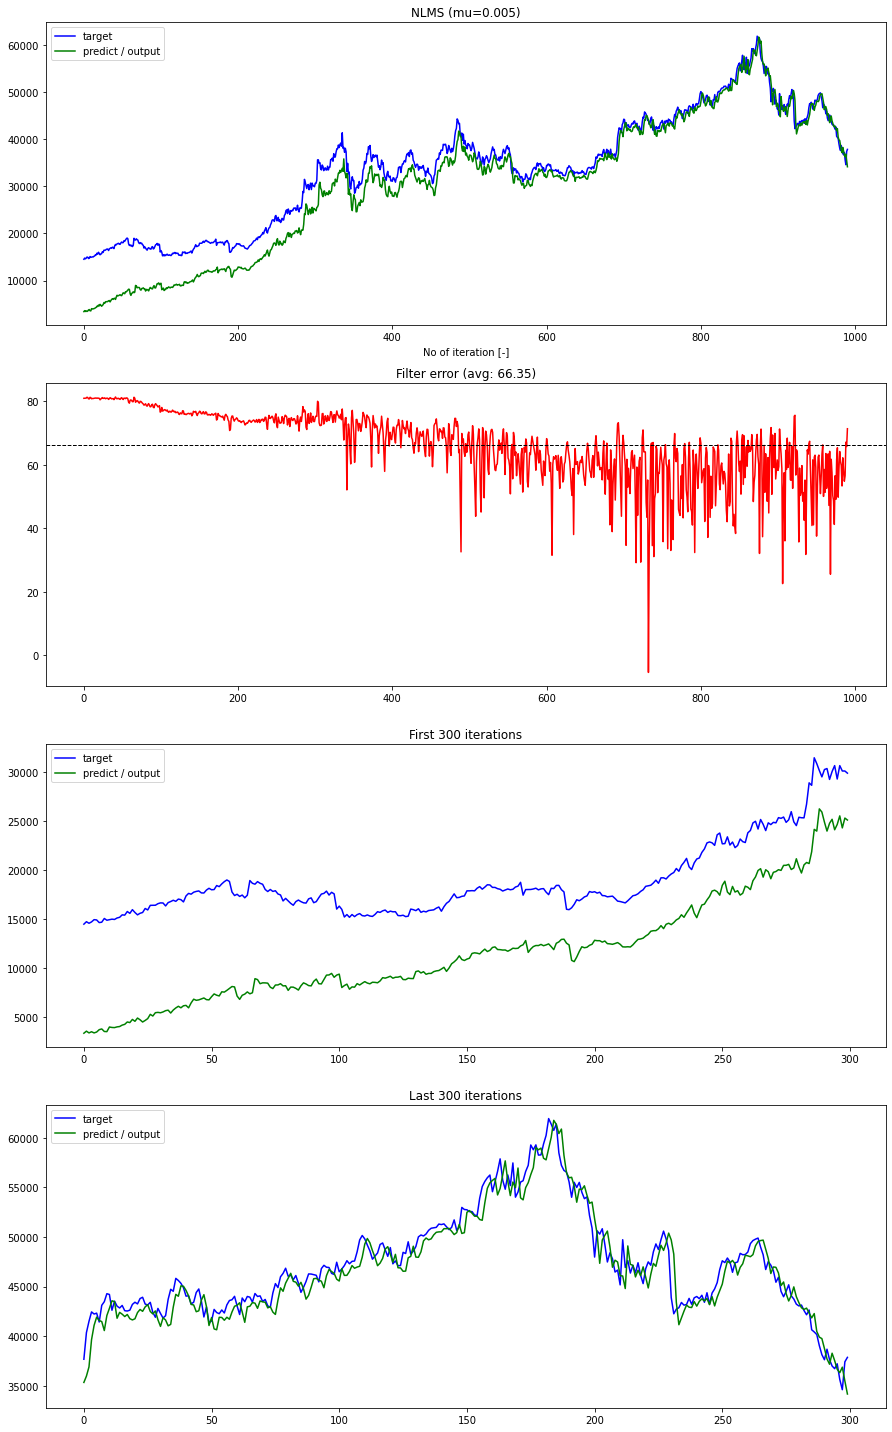

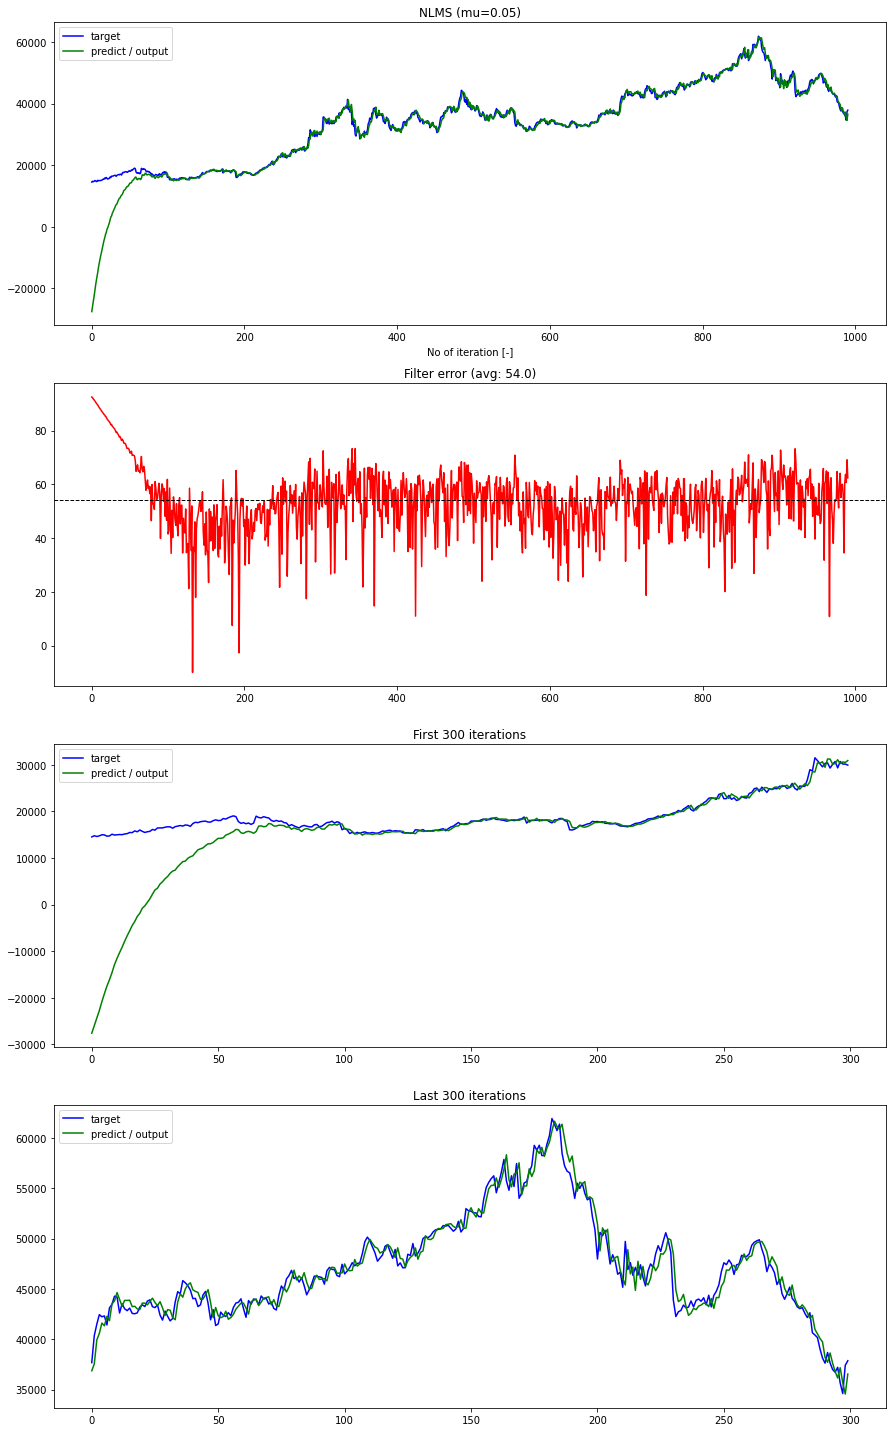

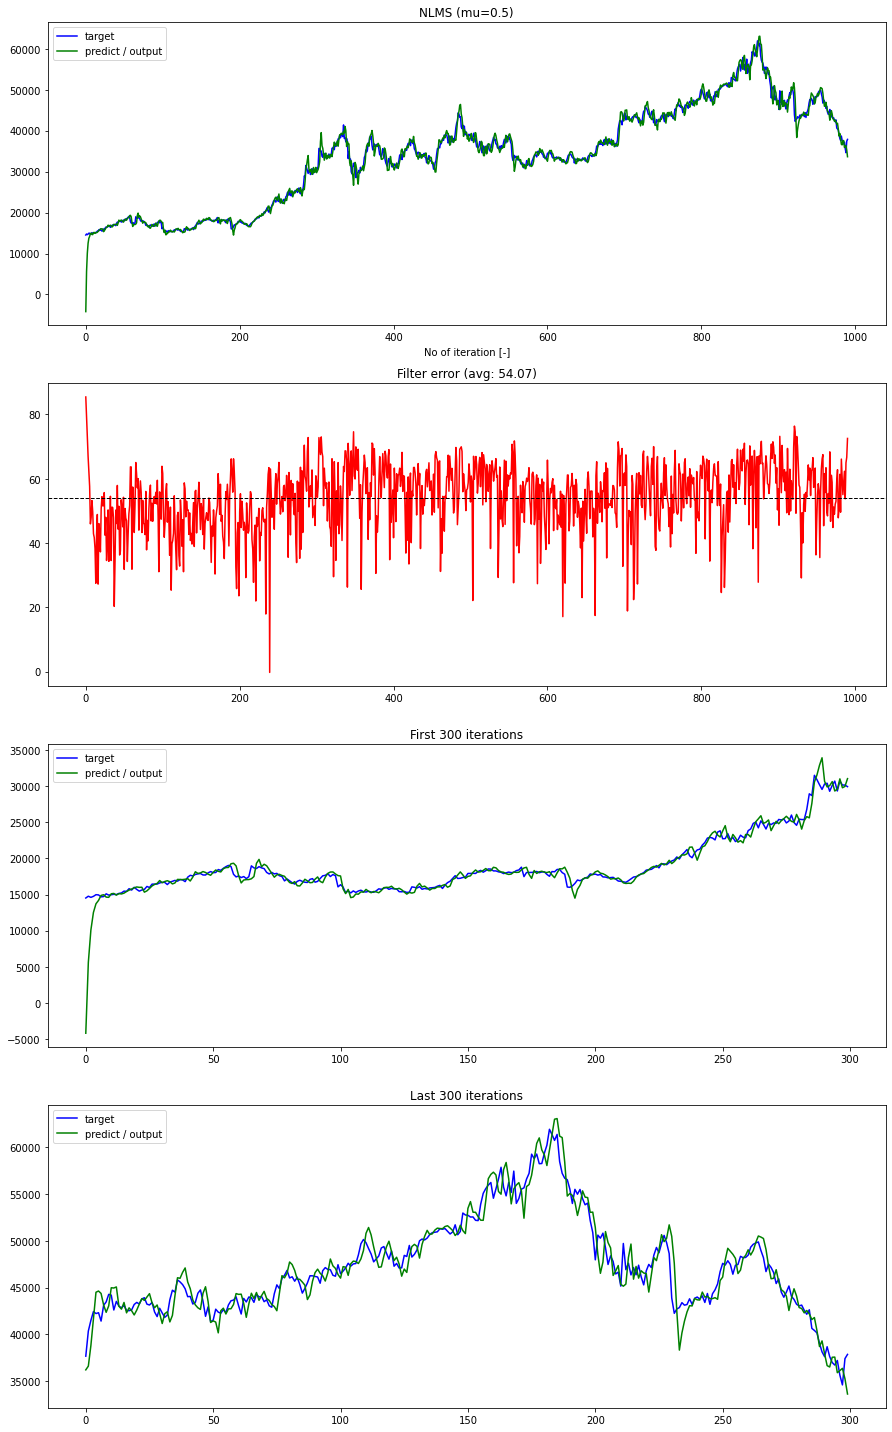

In [111]:
error_list = []
pa_list = []
for i, mu_ in enumerate([0.005, 0.05, 0.5]):
    f_nlms = pa.filters.FilterNLMS(n=n, mu=mu_, w='random')
    y, e, w = f_nlms.run(d, x)
    plot_filter_result(pred=y, actual=d, error=e, mu_val=mu_, n=n)
    _avg_error = round(np.mean(10*np.log10(e[: (len(e) - n)]**2)), 2)
    pa_list.append(f_nlms)
    error_list.append(_avg_error)

Next step is how we implement the filter on production (real-time basis). To simulate this, I will use the remaining data and loop to feed one iteration at a time.

Selected the filter with mu of 0.05
with avg eror of 54.0


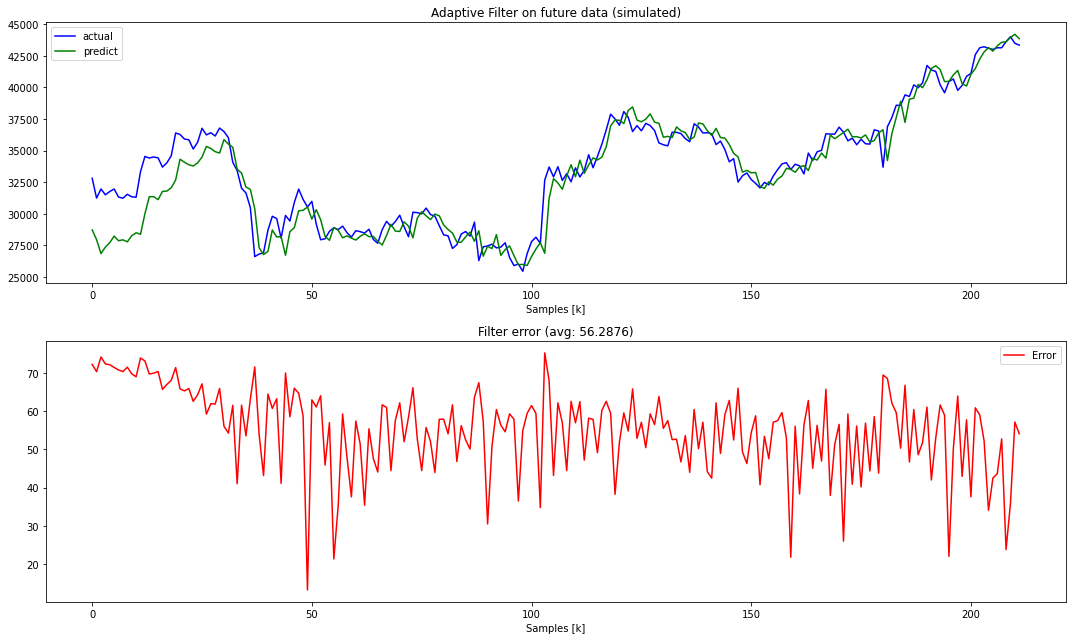

In [112]:
s_future = ts['Close'].values.flatten()[1000: ] 
filter_min_error = pa_list[np.argmin(error_list)]
print(f'Selected the filter with mu of {filter_min_error.mu}')
print(f'with avg eror of {error_list[np.argmin(error_list)]}') 
x_future = pa.input_from_history(s_future, n)
d_future = np.zeros(len(x_future))
N_future = len(x_future)

for i, k in enumerate(range((n-1), N_future)):
    d_future[i] = s_future[k+1]

actual_list = np.zeros(N_future)
predict_list = np.zeros(N_future)

# Simulate real-time prediction and update the filter
for k in range(N_future):
    x_input = x_future[k]
    y = filter_min_error.predict(x_input)
    d_actual = d_future[k]
    filter_min_error.adapt(d_actual, x_input)
    actual_list[k] = d_actual
    predict_list[k] = y
    
## show results
avg_error = np.round(np.mean(10*np.log10((actual_list -predict_list)**2)), 4)
plt.figure(figsize=(15,9))
plt.subplot(211)
plt.title("Adaptive Filter on future data (simulated)")
plt.xlabel("Samples [k]")
plt.plot(actual_list[n: (len(actual_list)-n)], "b", label="actual")
plt.plot(predict_list[n: (len(predict_list)-n)], "g", label="predict")
plt.legend()
plt.subplot(212)
plt.title(f'Filter error (avg: {avg_error})')
plt.xlabel("Samples [k]")
plt.plot(10*np.log10((actual_list[n: (len(actual_list)-n)] - \
                      predict_list[n: (len(predict_list)-n)])**2), 
         "r", label="Error")
plt.legend()
plt.tight_layout()
plt.show()